<a href="https://colab.research.google.com/github/seong-eun822/setting/blob/main/%ED%8C%80%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("pima-indians-diabetes.csv", encoding='cp949')

In [12]:
data

,임신,포도당,혈압,피부두꼐,인슐린,체질량지수,당뇨병혈통기능,나이,양/음
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
data.drop(columns='인슐린', inplace=True, axis=1)

In [14]:
data

,임신,포도당,혈압,피부두꼐,체질량지수,당뇨병혈통기능,나이,양/음
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [15]:
data.corr()

,임신,포도당,혈압,피부두꼐,체질량지수,당뇨병혈통기능,나이,양/음
임신,1.000000,0.129459,0.141282,-0.081672,0.017683,-0.033523,0.544341,0.221898
포도당,0.129459,1.000000,0.152590,0.057328,0.221071,0.137337,0.263514,0.466581
혈압,0.141282,0.152590,1.000000,0.207371,0.281805,0.041265,0.239528,0.065068
피부두꼐,-0.081672,0.057328,0.207371,1.000000,0.392573,0.183928,-0.113970,0.074752
체질량지수,0.017683,0.221071,0.281805,0.392573,1.000000,0.140647,0.036242,0.292695
당뇨병혈통기능,-0.033523,0.137337,0.041265,0.183928,0.140647,1.000000,0.033561,0.173844
나이,0.544341,0.263514,0.239528,-0.113970,0.036242,0.033561,1.000000,0.238356
양/음,0.221898,0.466581,0.065068,0.074752,0.292695,0.173844,0.238356,1.000000


In [16]:
data

,임신,포도당,혈압,피부두꼐,체질량지수,당뇨병혈통기능,나이,양/음
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [17]:
data.drop(columns='피부두꼐', inplace=True, axis=1)

In [18]:
data

,임신,포도당,혈압,체질량지수,당뇨병혈통기능,나이,양/음
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


In [26]:
x= data.iloc[:,0:6]
y=data.iloc[:,6]

In [27]:
x

,임신,포도당,혈압,체질량지수,당뇨병혈통기능,나이
0,6,148,72,33.6,0.627,50
1,1,85,66,26.6,0.351,31
2,8,183,64,23.3,0.672,32
3,1,89,66,28.1,0.167,21
4,0,137,40,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63
764,2,122,70,36.8,0.340,27
765,5,121,72,26.2,0.245,30
766,1,126,60,30.1,0.349,47


In [28]:
y

,양/음
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.1, random_state=42)

In [30]:
import tensorflow as tf
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5313 - loss: 1.6033
Epoch 2/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6305 - loss: 0.7808
Epoch 3/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6550 - loss: 0.7277
Epoch 4/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6657 - loss: 0.7393
Epoch 5/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6622 - loss: 0.7140
Epoch 6/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6568 - loss: 0.6622
Epoch 7/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7149 - loss: 0.6000
Epoch 8/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6740 - loss: 0.6697
Epoch 9/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7170 - loss: 0.6164
Epoch 10/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6916 - loss: 0.5941
Epoch 11/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7135 - loss: 0.6142
Epoch 12/50
691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

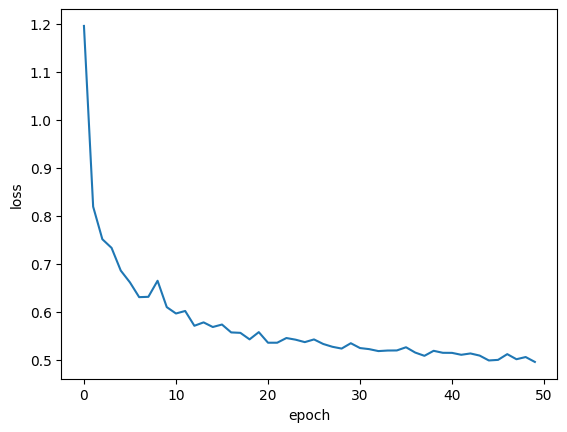

In [33]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

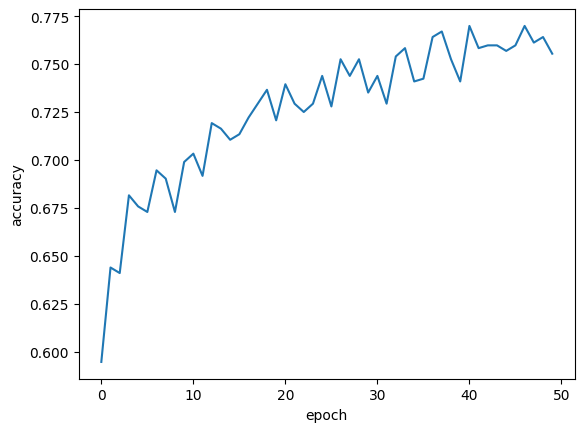

In [34]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()